In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC,SVR


In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [4]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
data.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [7]:
pip install pandas-profiling

     -------------------------------------- 315.3/315.3 kB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 22.6 MB/s eta 0:00:00
     ------------------------------------- 685.8/685.8 kB 45.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 102.7/102.7 kB ? eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 37.8 MB/s eta 0:00:00
     ------------------------------------- 296.5/296.5 kB 19.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=9dba455b3ba355e49dab56e3ea4dbe022a17fa2e4e4b52806f902c9ab52931c4
  Stored in directory: c:\users\prashant\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin
Note: you may need to restart the kernel to use updated packages.


## Generating Profile Report

In [8]:
from pandas_profiling import ProfileReport

In [9]:
profile = ProfileReport(data, title="Pandas Profiling Report")

In [10]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Preprocessing

In [11]:
df=data

<AxesSubplot:>

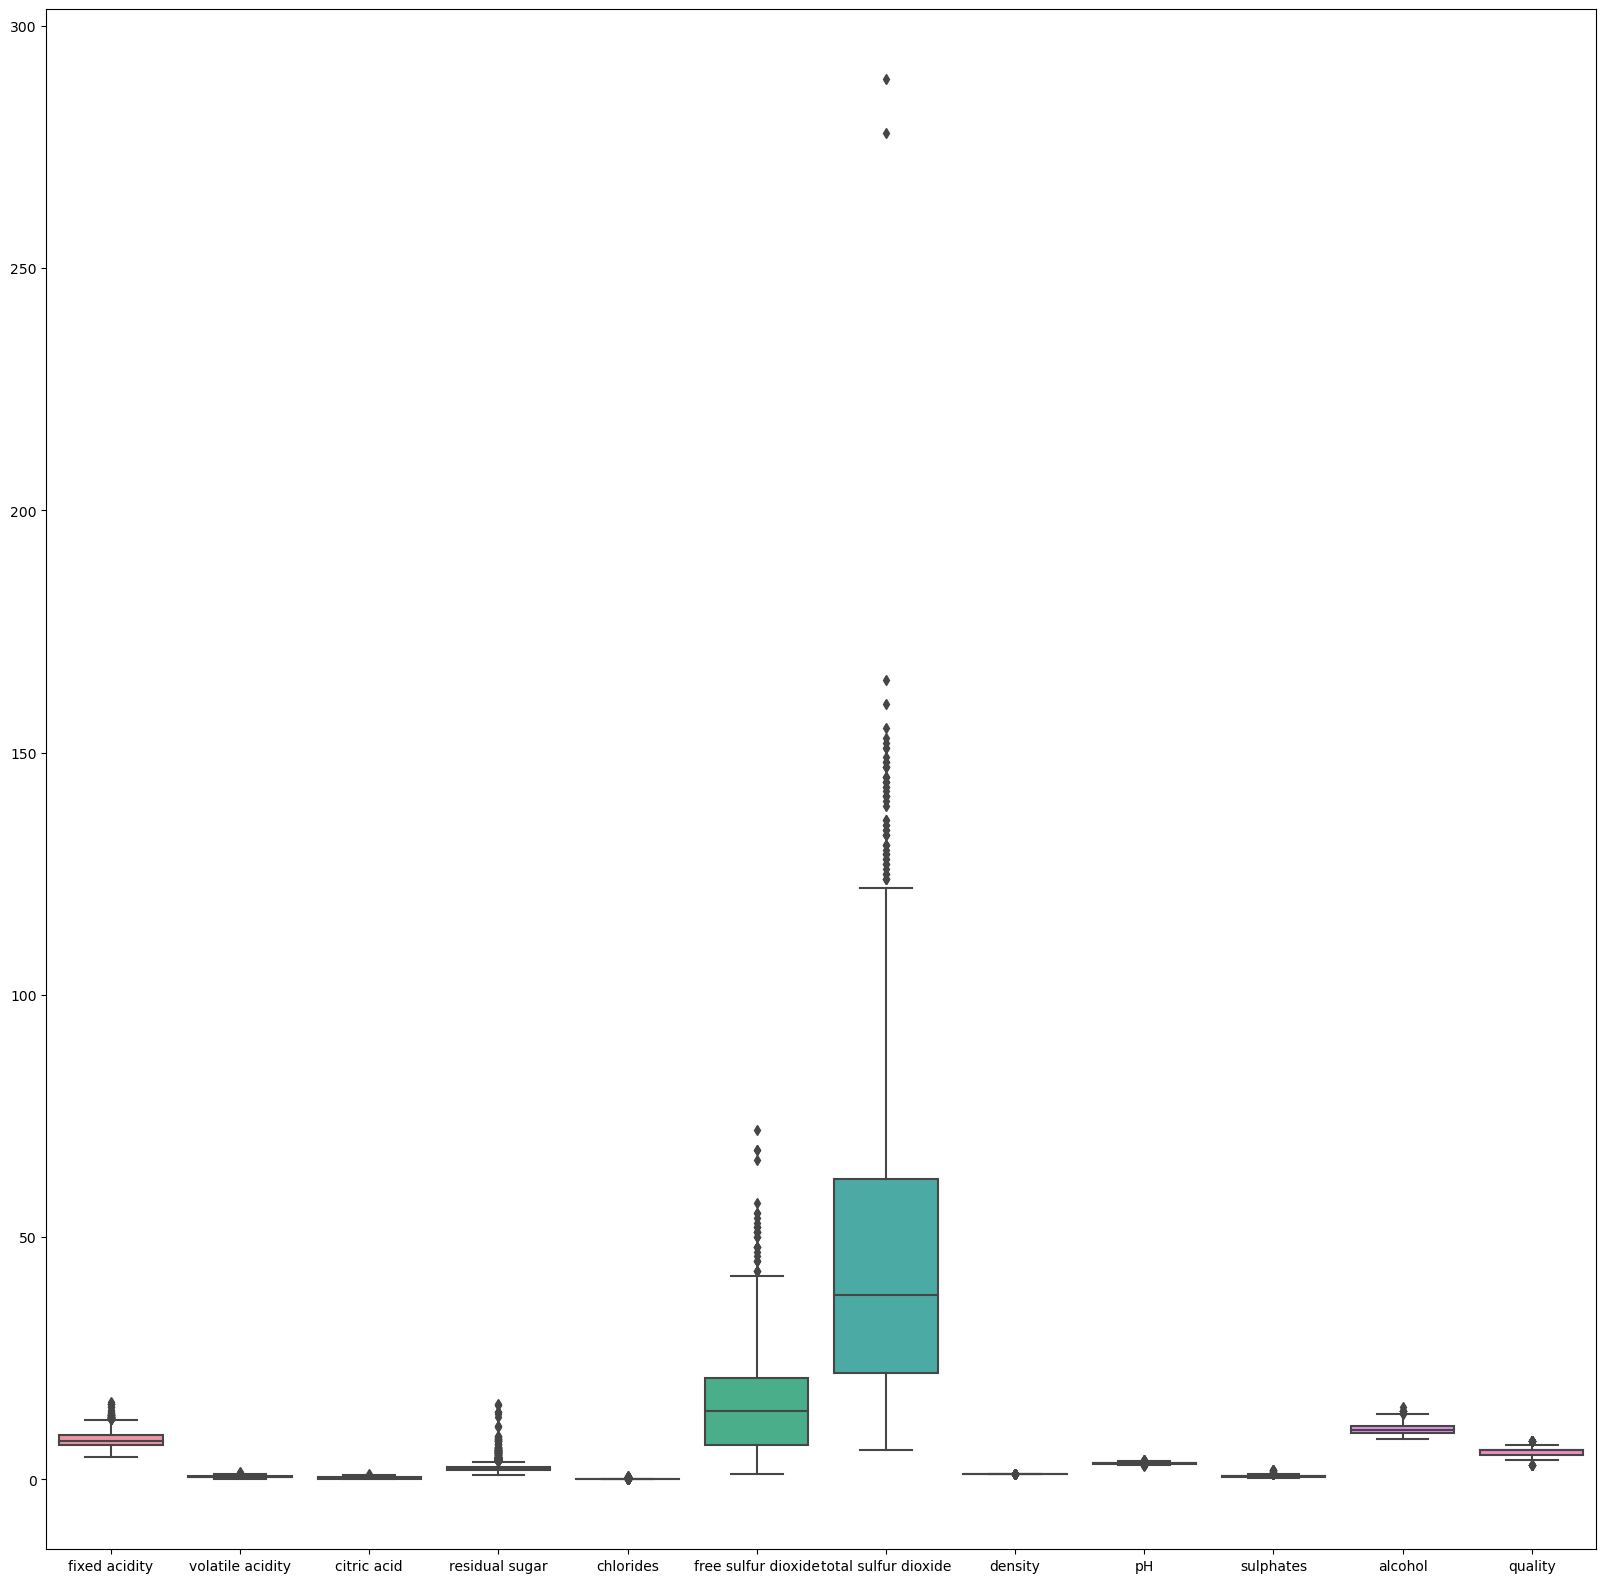

In [12]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df , ax = ax)

Outliers in Total Sulfur Dioxide

In [17]:
q = df['total sulfur dioxide'].quantile(.80)
df_new = df[df['total sulfur dioxide'] < q]

<AxesSubplot:>

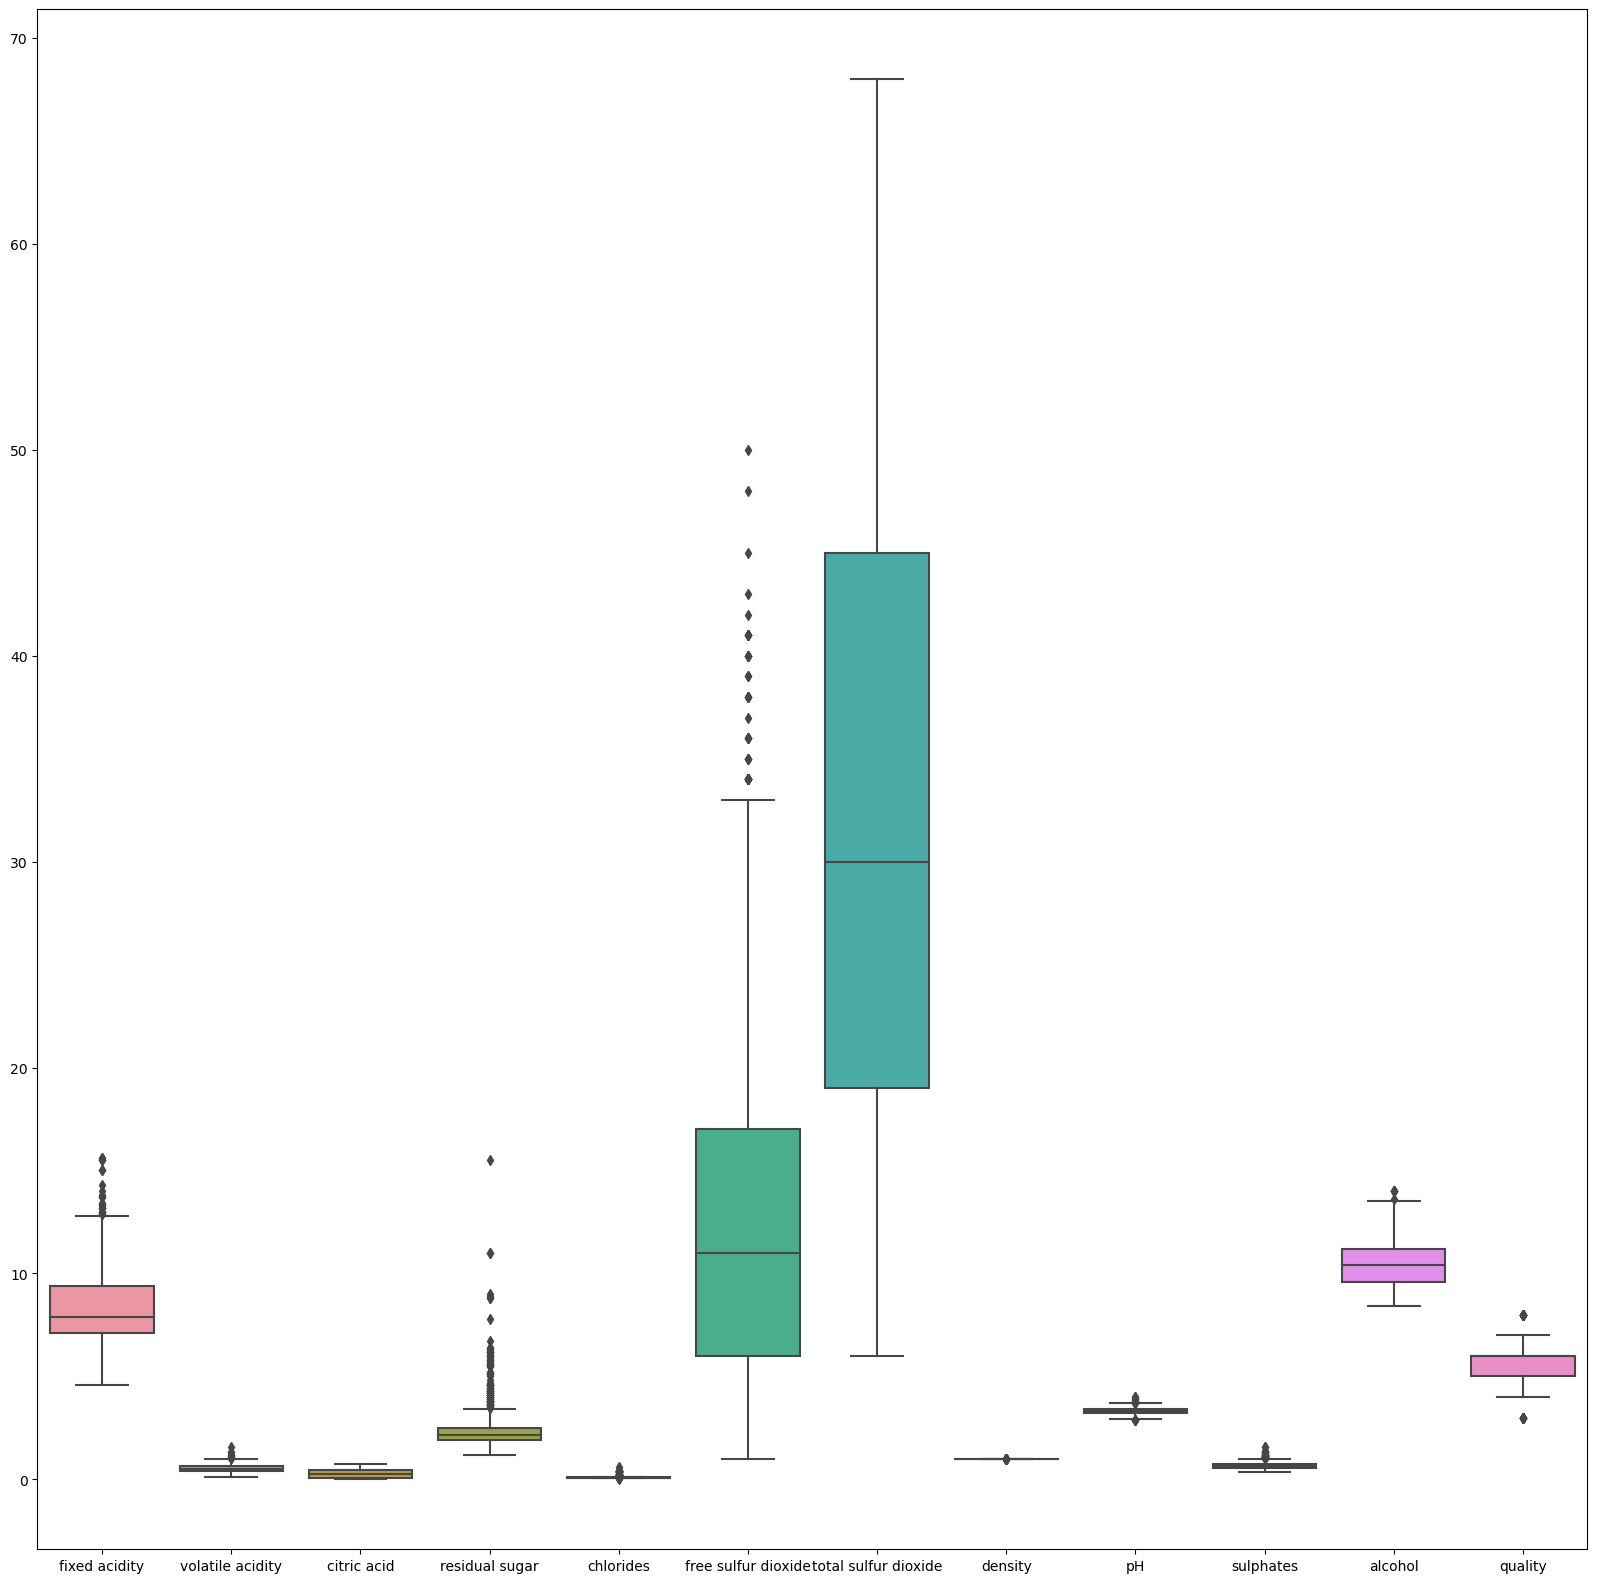

In [19]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new , ax = ax)
#Removal of outliers

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x=df_new.drop(columns='quality')
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1272 rows x 11 columns]

In [22]:
y=df_new['quality']

Finding vif score

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])


In [26]:
vif_score(x)

FEATURE  VIF_SCORE
0          fixed acidity   8.418290
1       volatile acidity   1.954382
2            citric acid   3.731780
3         residual sugar   1.599657
4              chlorides   1.475325
5    free sulfur dioxide   2.491877
6   total sulfur dioxide   2.479744
7                density   6.324904
8                     pH   3.462867
9              sulphates   1.436085
10               alcohol   2.969135

All the vif scores are below 9 so the features need not to be dropped

In [28]:
scaler=StandardScaler()

Train, Test, Split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = .20)

In [54]:
x_train_scaled=scaler.fit_transform(x_train)

In [55]:
svc=SVC()

In [56]:
svc.fit(x_train_scaled,y_train)

SVC()

In [57]:
x_test_scaled=scaler.fit_transform(x_test)

In [58]:
svc.score(x_test_scaled,y_test)

0.6313725490196078

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param={
    'C':[0.25,0.5,1,2,5],
    'kernel': ['rbf','linear']    
}

In [61]:
grid_cv = GridSearchCV(svc,param_grid=param )

In [62]:
grid_cv.fit(x_train_scaled, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.25, 0.5, 1, 2, 5],
                         'kernel': ['rbf', 'linear']})

In [63]:
grid_cv.best_params_

{'C': 2, 'kernel': 'rbf'}

Rerun the model with best parameters

In [65]:
svc=SVC(C=2,kernel='rbf')

In [66]:
svc.fit(x_train_scaled,y_train)

SVC(C=2)

In [67]:
svc.score(x_test_scaled,y_test)

0.6509803921568628

### Initial Score was 63% and New score is 65%

# Admission Data Analysis

In [80]:
df_admission=pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [81]:
df_admission

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1              0.92  
1           1              0.76  
2           1              0.72  
3           1              0.80  
4           0              0.65  
..        ...               ...  
495         1              0.87  
496         1              0.96  
497         1              0.93  
498         0              0.73  
499         0              0.84  

[500 rows x 9 columns]

In [82]:
ProfileReport(df_admission)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [83]:
df_admission.describe().T

count       mean         std     min       25%     50%  \
Serial No.         500.0  250.50000  144.481833    1.00  125.7500  250.50   
GRE Score          500.0  316.47200   11.295148  290.00  308.0000  317.00   
TOEFL Score        500.0  107.19200    6.081868   92.00  103.0000  107.00   
University Rating  500.0    3.11400    1.143512    1.00    2.0000    3.00   
SOP                500.0    3.37400    0.991004    1.00    2.5000    3.50   
LOR                500.0    3.48400    0.925450    1.00    3.0000    3.50   
CGPA               500.0    8.57644    0.604813    6.80    8.1275    8.56   
Research           500.0    0.56000    0.496884    0.00    0.0000    1.00   
Chance of Admit    500.0    0.72174    0.141140    0.34    0.6300    0.72   

                      75%     max  
Serial No.         375.25  500.00  
GRE Score          325.00  340.00  
TOEFL Score        112.00  120.00  
University Rating    4.00    5.00  
SOP                  4.00    5.00  
LOR                  4.00    5.00  
CGPA                 9.04    9.92  
Research             1.00    1.00  
Chance of Admit      0.82    0.97

No missing data

In [84]:
df_admission.drop(columns=['Serial No.'],axis=1,inplace=True)

In [85]:
y=df_admission['Chance of Admit ']

In [86]:
x=df_admission.drop(columns=['Chance of Admit '])

### Multicollinearity Check using VIF score

In [102]:
vif_score(x)
#All the scores are below 9, so no need to drop any columns

FEATURE  VIF_SCORE
0          GRE Score   4.464249
1        TOEFL Score   3.904213
2  University Rating   2.621036
3                SOP   2.835210
4               LOR    2.033555
5               CGPA   4.777992
6           Research   1.494008

### Outlier detection

<AxesSubplot:>

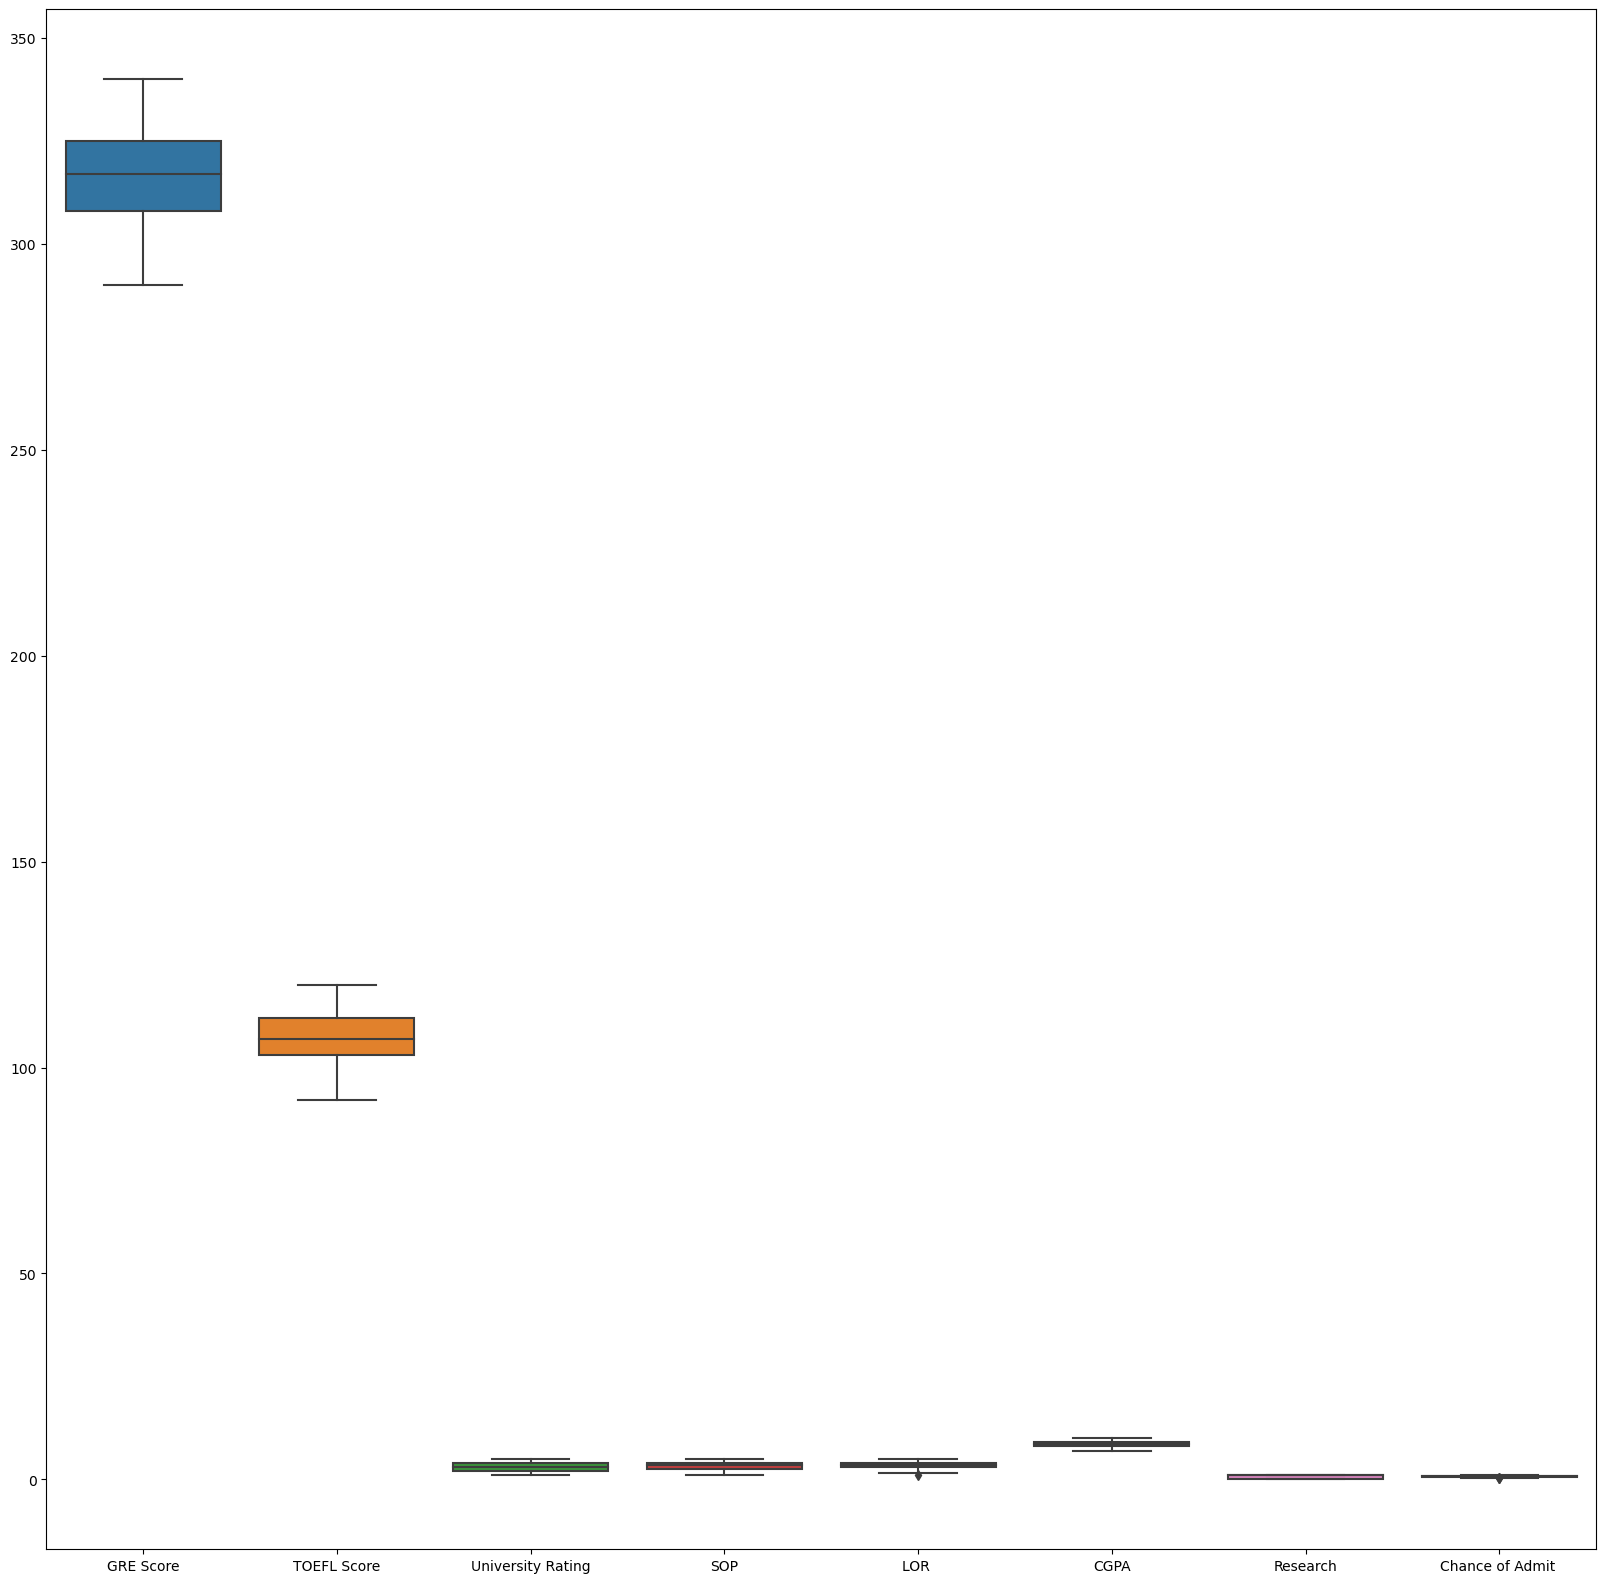

In [87]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_admission , ax = ax)

No Outliers

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = .20)

In [89]:
x_train_scaled=scaler.fit_transform(x_train)

In [90]:
svr=SVR()

In [91]:
svr.fit(x_train_scaled,y_train)

SVR()

In [92]:
x_test_scaled=scaler.fit_transform(x_test)

In [93]:
svr.score(x_test_scaled,y_test)

0.7222127704630339

In [94]:
param={
    'C':[0.25,0.5,1,2,5],
    'kernel': ['rbf','linear']    
}

In [95]:
grid_cv = GridSearchCV(svr,param_grid=param )

In [96]:
grid_cv.fit(x_train_scaled, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.25, 0.5, 1, 2, 5],
                         'kernel': ['rbf', 'linear']})

In [97]:
grid_cv.best_params_

{'C': 5, 'kernel': 'linear'}

In [98]:
svr=SVR(C=5,kernel='linear')

In [99]:
svr.fit(x_train_scaled,y_train)

SVR(C=5, kernel='linear')

In [100]:
svr.score(x_test_scaled,y_test)

0.7910566311784801

## Initial Score was 72% and New score is 79%